# MetaCritic Game Reviews

In [52]:
import pandas as pd
import seaborn as sns

In [53]:
game_df = pd.read_json(r'C:\Users\pad39\Downloads\games\metacritic_games.json')
game_df.head()

,name,platform,developer,publisher,genre(s),players,rating,attribute,release_date,link,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative,user_score
0,Command & Conquer,PC,Westwood Studios,Virgin Interactive,Sci-Fi,1-4,T,None,"Aug 31, 1995",/game/pc/command-conquer,5,0,0,94,47,0,1,8.9
1,Full Throttle,PC,LucasArts,LucasArts,Adventure,None,None,None,"Apr 30, 1995",/game/pc/full-throttle,6,2,0,86,18,1,0,8.7
2,Battle Arena Toshinden,PS,Tamsoft,SCEA,Action,1-2,T,None,"Sep 9, 1995",/game/playstation/battle-arena-toshinden,1,3,0,69,1,0,1,5.8
3,Sid Meier's Civilization II,PC,MPS Labs,MicroProse,Strategy,1 Player,K-A,None,"Feb 29, 1996",/game/pc/sid-meiers-civilization-ii,7,0,0,94,46,0,1,8.9
4,Quake,PC,id Software,id Software,Action,1-16,M,None,"Jun 22, 1996",/game/pc/quake,9,0,0,94,84,4,1,8.8


In [54]:
#data set has 20422 rows and 18 columns
game_df.shape

(20422, 18)

In [55]:
game_df.columns

Index(['name', 'platform', 'developer', 'publisher', 'genre(s)', 'players',
       'rating', 'attribute', 'release_date', 'link', 'critic_positive',
       'critic_neutral', 'critic_negative', 'metascore', 'user_positive',
       'user_neutral', 'user_negative', 'user_score'],
      dtype='object')

In [56]:
game_df.dtypes

name               object
platform           object
developer          object
publisher          object
genre(s)           object
players            object
rating             object
attribute          object
release_date       object
link               object
critic_positive     int64
critic_neutral      int64
critic_negative     int64
metascore           int64
user_positive       int64
user_neutral        int64
user_negative       int64
user_score         object
dtype: object

In [57]:
metascore_mean = game_df['metascore'].mean()
metascore_median = game_df['metascore'].median()
print(metascore_mean)
print(metascore_median)

68.82690236019978
71.0


In [58]:
game_df.groupby(['name', 'rating']).mean()

,,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative
name,rating,,,,,,,
#IDARB,E,23.0,8.0,0.000000,77.0,17.000000,3.000000,1.000000
#KILLALLZOMBIES,T,0.0,6.0,1.500000,58.0,1.000000,0.000000,0.500000
'Splosion Man,E10+,48.0,4.0,0.000000,84.0,14.000000,1.000000,1.000000
'n Verlore Verstand,E,0.0,4.0,0.000000,57.0,0.000000,0.000000,0.000000
.detuned,E,0.0,4.0,5.000000,46.0,0.000000,4.000000,12.000000
...,...,...,...,...,...,...,...,...
theHunter: Call of the Wild,T,4.0,3.0,0.333333,74.0,7.666667,2.666667,2.333333
uDraw Studio,E,2.0,7.0,0.000000,71.0,1.000000,0.000000,0.000000
uDraw Studio: Instant Artist,E,0.5,3.0,1.000000,58.5,0.500000,0.000000,0.500000


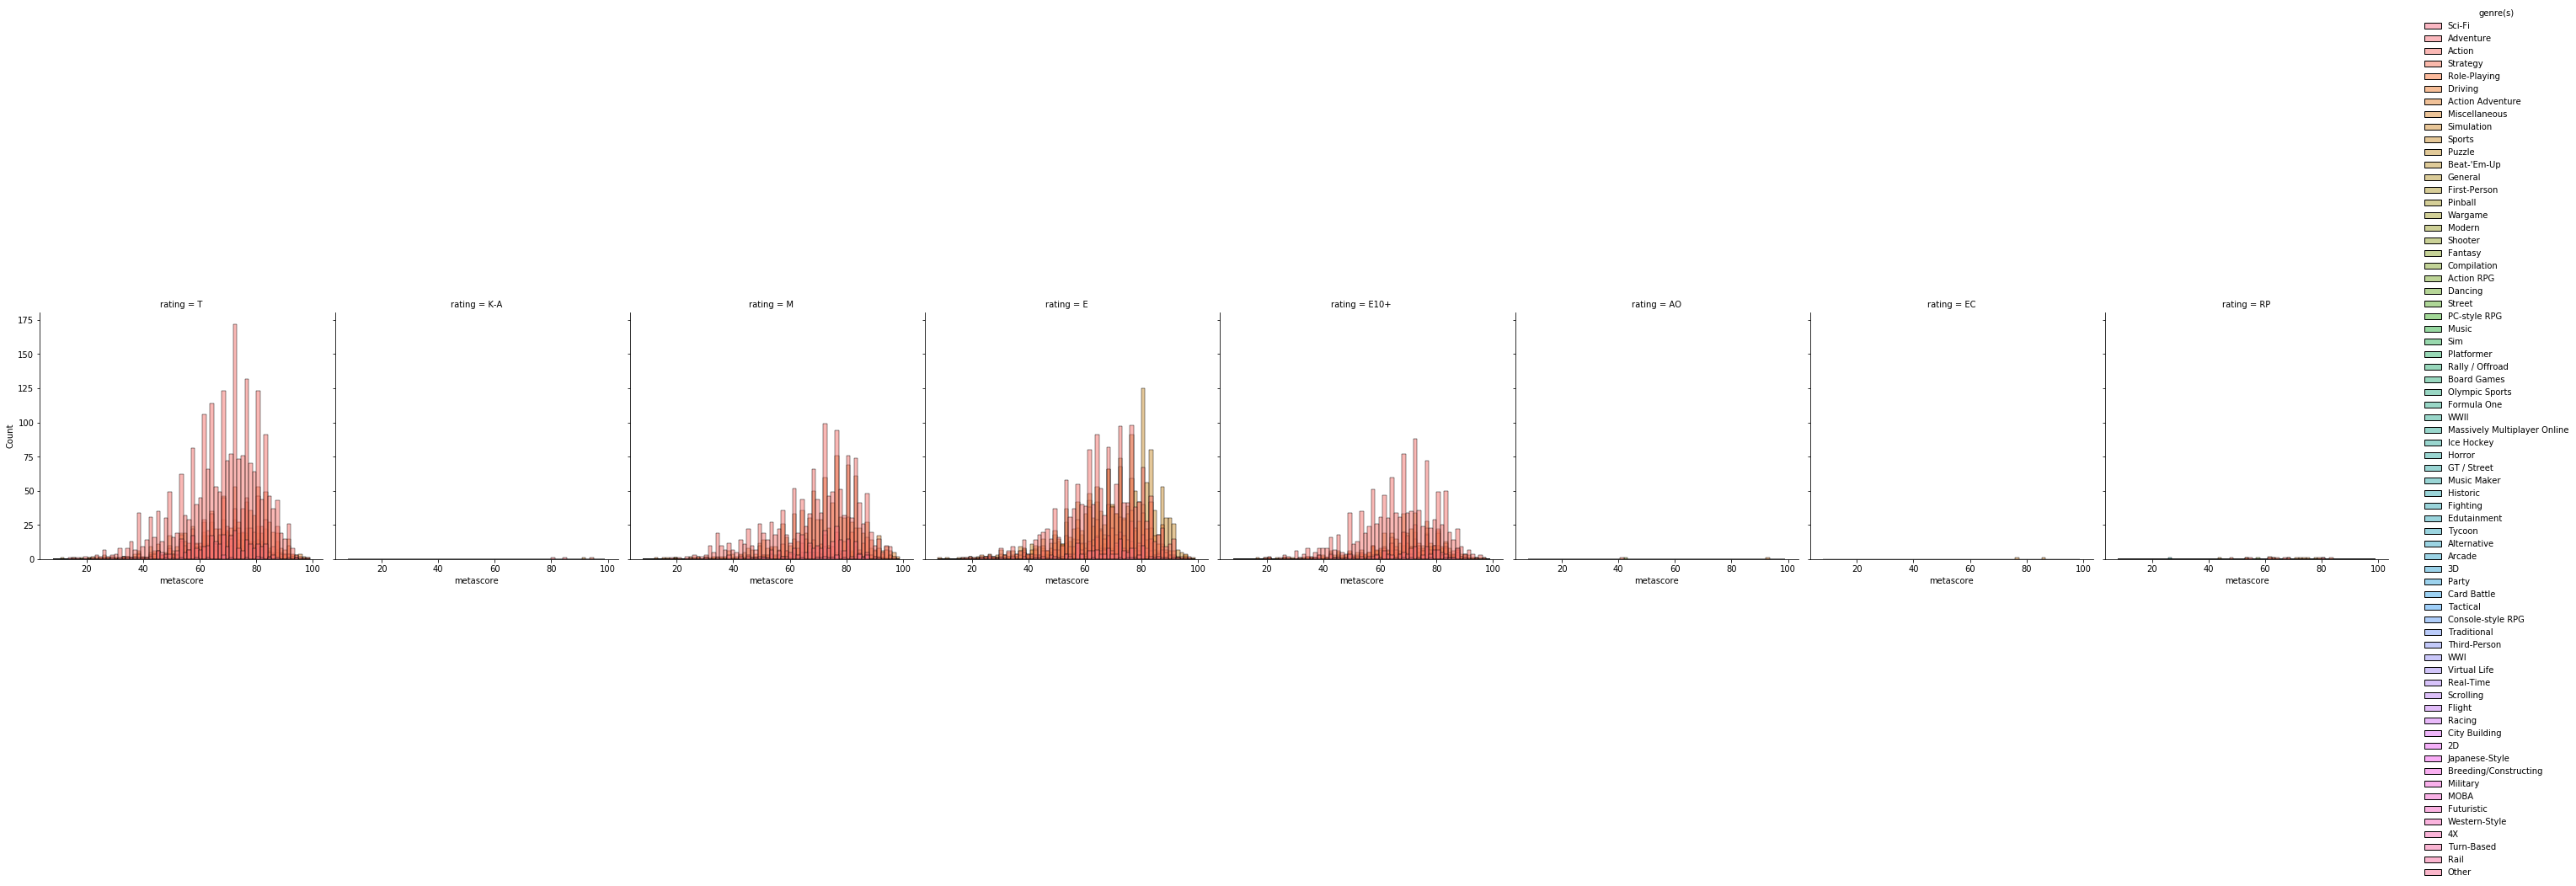

In [59]:

plot = sns.displot(game_df, x='metascore', col='rating', hue='genre(s)')
plot

The graphs above say alot about this data set for starters based of the counts on the histogram it is safe to say that this data set mostly comprises of games rated, E, T, M and E10+. This is not suprising because these are common ratings for games. Interestingly enough they all seem to skew to the left, this implies that the median is greater than the mean.

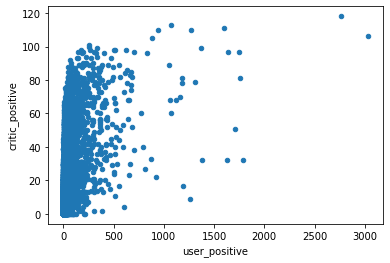

In [60]:
game_df.plot.scatter('user_positive', 'critic_positive')

Judging from this scatter plot there is no pattern between critics view of a game and the users.

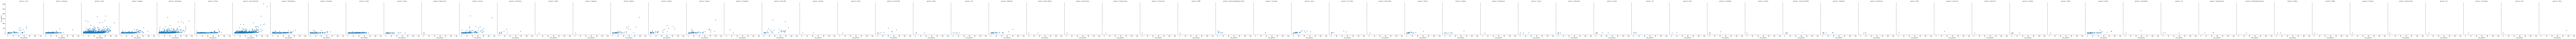

In [61]:
#this is tricky to read so Im going to scale the data
sns.lmplot(x='critic_positive',y='user_positive', data=game_df,
           col='genre(s)', fit_reg=False)

In [65]:
#the fomrula for z score is calculated by subtracticting an observation by the mean of all observations and then dividiing
#it by the standard devation of the sample. I used this formula to plug into a formloop for both columns and create two new 
#columns with the zscores for the user_positve reviews and the critic user positive reviews
critic_positive_std=[]
user_positive_std=[]
for i in game_df['critic_positive']:
    game_df['critic_positive_zscore']=(game_df['critic_positive'] - game_df['critic_positive'].mean())/game_df['critic_positive'].std()
for i in game_df['user_positive']:
    game_df['user_positive_zscore']=(game_df['user_positive'] - game_df['user_positive'].mean())/game_df['user_positive'].std()
game_df.head()

,name,platform,developer,publisher,genre(s),players,rating,attribute,release_date,link,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative,user_score,critic_positive_zscore,user_positive_zscore
0,Command & Conquer,PC,Westwood Studios,Virgin Interactive,Sci-Fi,1-4,T,None,"Aug 31, 1995",/game/pc/command-conquer,5,0,0,94,47,0,1,8.9,-0.387219,0.419191
1,Full Throttle,PC,LucasArts,LucasArts,Adventure,None,None,None,"Apr 30, 1995",/game/pc/full-throttle,6,2,0,86,18,1,0,8.7,-0.320543,0.015581
2,Battle Arena Toshinden,PS,Tamsoft,SCEA,Action,1-2,T,None,"Sep 9, 1995",/game/playstation/battle-arena-toshinden,1,3,0,69,1,0,1,5.8,-0.653923,-0.221018
3,Sid Meier's Civilization II,PC,MPS Labs,MicroProse,Strategy,1 Player,K-A,None,"Feb 29, 1996",/game/pc/sid-meiers-civilization-ii,7,0,0,94,46,0,1,8.9,-0.253867,0.405273
4,Quake,PC,id Software,id Software,Action,1-16,M,None,"Jun 22, 1996",/game/pc/quake,9,0,0,94,84,4,1,8.8,-0.120514,0.934141


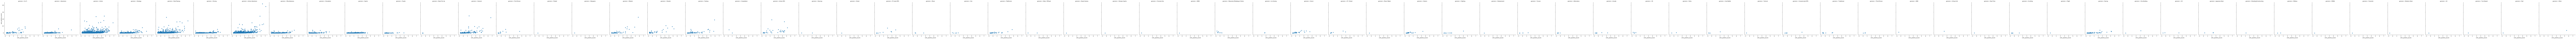

In [67]:
sns.lmplot(x='critic_positive_zscore',y='user_positive_zscore', data=game_df,
           col='genre(s)', fit_reg=False)